In [1]:
from HD_DataLoader import *
from HD_DataLoader import SplitNormalFaulty
import os
folder_path = os.path.join(os.getcwd(), 'HD_data') 

example1 = HD(data_path = folder_path)

database = example1.generate_database()

database


# test, train, val  = example1.get_NN_Loaders()

---------------------------------------------------------
Generating database for HD's


{0: {'attributes': {'HD_label': 'F1',
   'HD_status': 1,
   'speed': '10',
   'test_iter': '1'},
  'Microphone': {'SampleRate': 44100,
   'Data': array([[-0.00213623, -0.00210571],
          [-0.00177002, -0.0017395 ],
          [ 0.00219727,  0.00219727],
          ...,
          [-0.0020752 , -0.0020752 ],
          [ 0.00015259,  0.00018311],
          [ 0.00152588,  0.00152588]], dtype=float32)},
  'Vibration': {'SampleRate': 3200,
   'time': array([0.000000e+00, 3.100000e-04, 6.300000e-04, ..., 5.999906e+01,
          5.999938e+01, 5.999969e+01]),
   'X_vibr': array([ 0.17969, -1.11719, -1.14062, ..., -1.25   , -1.26562, -1.07031]),
   'Y_vibr': array([-1.6875 , -0.24219, -0.39844, ..., -0.45312, -0.46094, -0.49219]),
   'Z_vibr': array([ 2.5625 , -0.25781, -0.46875, ..., -0.25   , -0.65625, -0.32812])},
  'dSpace': {'SampleRate': 500,
   'time': array([0.00000000e+00, 1.99982594e-03, 3.99969197e-03, ...,
          6.08454390e+01, 6.08474389e+01, 6.08494387e+01]),
   'I_bat': arra

In [ ]:
print(database[3]['attributes'])

folder_path_new =  os.path.join(folder_path, 'Microphone') 

for file_name in os.listdir(folder_path_new):
    base_name = splitext(file_name)[0]

        # Split the file name into individual words
    words = base_name.split('_')

    if database[3]['attributes']['HD_label']in words and database[3]['attributes']['speed']in words and database[3]['attributes']['test_iter'] in words: 
        print(file_name)



In [ ]:
file_name
import scipy.io.wavfile as wav

sr, data = wav.read(folder_path_new + '\\' + file_name) 
sr

In [ ]:
folder_path_new =  os.path.join(folder_path, 'dSpace') 

file_name = 'F1_dSpace_test_1_speed_10_sec60.csv'

arr = np.loadtxt(folder_path_new + '\\' + file_name,
                 delimiter=",", dtype=str, usecols=(1,2,3,4,5,6), skiprows=16)
tracename = arr[0]
print(arr[12])

data = arr[12:]

data = data.astype(float)
data[:,4]


In [5]:
folder_path_new =  os.path.join(folder_path, 'Vibration') 

file_name = 'F1_Vibr_test_1_speed_10_fs3200_secs60.csv'

arr = np.loadtxt(folder_path_new + '\\' + file_name,
                 delimiter=",", dtype=str) 

data = arr[1:]

data = data.astype(float)
data[:,0]

array([0.000000e+00, 3.100000e-04, 6.300000e-04, ..., 5.999906e+01,
       5.999938e+01, 5.999969e+01])

In [3]:
test = SplitNormalFaulty(database)

working, faulty = test.split_faulty_working_vib('X_vibr')


Data_prep = DataPreprocessing(working, faulty)

# batches, labels = Data_prep.create_data_batches()


batches, labels = Data_prep.create_data_batches()




Number of batches is 11520
Number of batches is 11520


In [12]:
# len(batches)

# dataset = CustomImageDataset(batches, labels)

# data, label = dataset[0]

from torch.utils.data import DataLoader

x_train, x_test, y_train, y_test = train_test_split(batches, labels, test_size=0.4, random_state=42)

training_data = CustomImageDataset(x_train, y_train)
test_data = CustomImageDataset(x_test, y_test)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
plt.plot(img)
plt.show()
print(f"Label: {label}")

In [9]:
# data = working

# start_time = 0
# stop_time = 1
# window_length = 1000
# stride = 1000

# data_length = len(data[0])
# start_sample = round(start_time * data_length)
# stop_sample = round(stop_time * data_length)

# batches = []

# for data_loop in data: #Kutnaam
#     for i in range(start_sample,stop_sample,stride):
#         batches.append(data_loop[i:i+window_length])

# batches

batchtest = NeuralNetworkLoaders(working)

batches, batches_label = batchtest._create_batches(working, 1, 0.4, 0.6, 10000, 100)

batches_label






Number of batches is 31752


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


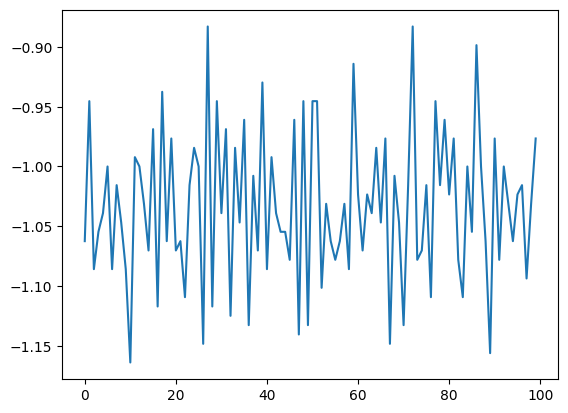

In [8]:
import matplotlib.pyplot as plt

plt.plot(working_batches[2])
plt.show()